<a href="https://colab.research.google.com/github/Fatai-soliu/10Analytics-Hackathon/blob/main/Subject_Line_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
                  'punkt',
                   'wordnet',
                    'omw-1.4',
                     'vader_lexicon'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Data Loading

In [14]:
#Importing the data from drive
data = pd.read_excel('/content/drive/MyDrive/RCN/Project_10_NewData.xlsx')

data.head(10)

,Datesent,Campaign Name,Subject,Total Number Sent,Total Number Delivered,Total Unique Opens,Total Number of Clicks,Total Undelivered,CampaignId
0,2021-10-11 09:45:00,Fertility - Your conference resources - MAND-R...,Your conference resources | RCN Fertility Nurs...,63,61,42,54,2,58IDH9E;0E76;0HF440;F970333G6D3DI457
1,2021-01-11 16:52:00,IC-HWIG-160125-2010 - Stoke Mandeville Pay Cam...,Join us at Stoke Mandeville this month,661,658,225,16,1,I8364GD90GE6;0HF440;F970333G6D3DI457
2,2021-01-11 09:00:00,Women's Health October 2021,Your RCN Womens health exhibition update,69,62,7,0,0,F8:DIEGF0546:0HF440;F970333G6D3DI4;H
3,27/10/2021 11:01,SR-RMCI-122423-2610 - Final reminder of Employ...,"@FIRSTNAME@, final chance to share your experi...",90787,90711,9775,1443,8,9I443<<80556:0HF440;F970333G6D3DI4;H
4,29/10/2021 10:00,IC-LDIX-172949-2710 Scotland PNC election fina...,Could you represent Scotland on the RCN Profes...,21001,20965,4615,117,3,4F4FHH;:0446;0HF440;F970333G6D3DI4;H
5,29/10/2021 09:11,IC-LDIX-154039-2510 Students Committee electio...,"Are you ready to take the next step, @FIRSTNAME@?",84,84,31,6,0,733I;E;8095690HF440;F970333G6D3DI6:;
6,29/10/2021 11:50,MAND-O2-MTHO-092307-2710-MTHO-095128-2710 RCN ...,"@FIRSTNAME@, your RCN branch needs you",3880,3855,1052,104,2,<G;484ED0E76;0HF440;F970333G6D3DI6:;
7,19/09/2024 15:49,Women's Health | Bookings open | PDL-LSAV-1614...,"@Name@, have you booked your place?",16100,16085,7388,449,0,DDFG8<H;098:90HI440D9:30333G6D3DI6D:
8,27/09/2024 15:16,IC-SMCM-153448-1909 Health and safety month,It's been 50 years,291,290,161,32,0,58G5DD3;0:E:D0HI440DF540333G6D3DI6D:
9,26/09/2024 10:02,MAND-O2-SKAH-095654-2309-SKAH-124637-2309 Lond...,Meet the London candidates standing for RCN Co...,62799,62494,27056,1275,7,G39<D3<80<6:D0HI440DF540333G6D3DI6D:


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Datesent                9858 non-null   object
 1   Campaign Name           9858 non-null   object
 2   Subject                 9858 non-null   object
 3   Total Number Sent       9858 non-null   int64 
 4   Total Number Delivered  9858 non-null   int64 
 5   Total Unique Opens      9858 non-null   int64 
 6   Total Number of Clicks  9858 non-null   int64 
 7   Total Undelivered       9858 non-null   int64 
 8   CampaignId              9858 non-null   object
dtypes: int64(5), object(4)
memory usage: 693.3+ KB


#Data Cleaning

In [10]:
#Checking if all data are in the correct data type

data.dtypes

,0
Datesent,object
Campaign Name,object
Subject,object
Total Number Sent,int64
Total Number Delivered,int64
Total Unique Opens,int64
Total Number of Clicks,int64
Total Undelivered,int64
CampaignId,object


In [16]:
# Convert datesent from object to datetime

data['Datesent'] = pd.to_datetime(data['Datesent'], dayfirst='FALSE', yearfirst='TRUE', format='mixed')

data.dtypes
data.head(100)

,Datesent,Campaign Name,Subject,Total Number Sent,Total Number Delivered,Total Unique Opens,Total Number of Clicks,Total Undelivered,CampaignId
0,2021-10-11 09:45:00,Fertility - Your conference resources - MAND-R...,Your conference resources | RCN Fertility Nurs...,63,61,42,54,2,58IDH9E;0E76;0HF440;F970333G6D3DI457
1,2021-01-11 16:52:00,IC-HWIG-160125-2010 - Stoke Mandeville Pay Cam...,Join us at Stoke Mandeville this month,661,658,225,16,1,I8364GD90GE6;0HF440;F970333G6D3DI457
2,2021-01-11 09:00:00,Women's Health October 2021,Your RCN Womens health exhibition update,69,62,7,0,0,F8:DIEGF0546:0HF440;F970333G6D3DI4;H
3,2021-10-27 11:01:00,SR-RMCI-122423-2610 - Final reminder of Employ...,"@FIRSTNAME@, final chance to share your experi...",90787,90711,9775,1443,8,9I443<<80556:0HF440;F970333G6D3DI4;H
4,2021-10-29 10:00:00,IC-LDIX-172949-2710 Scotland PNC election fina...,Could you represent Scotland on the RCN Profes...,21001,20965,4615,117,3,4F4FHH;:0446;0HF440;F970333G6D3DI4;H
...,...,...,...,...,...,...,...,...,...
95,2018-06-06 08:00:00,HWIGGINTON-131910-0406 - Southampton Branch mtg,Your local branch meeting,3687,3687,828,7,0,79:;D4;E0I6FF0HD440D;450333G6D3ED359
96,2018-05-06 13:50:00,Remail: Copy of CMCQUILLAN-162834-2405 Reps re...,Don't forget to book.,99,99,14,12,0,7H:;D4;E0I6FF0HD440D;450333G6D3ED359
97,2018-11-06 11:00:00,NMILLS-132643-2305 Delirium Champion - share y...,Delirium Champions - share your experience,592,592,208,19,0,<D::4D<50I6FF0HD440D;450333G6D3ED359
98,2018-11-06 10:42:00,RGREEN-155120-3105 More than 3 Forums - Forums 4,Apply to join a forum steering committee,3670,3670,1180,359,0,EID:4H<;0I6FF0HD440D;450333G6D3ED359


In [21]:
# Checking for any missing value in the data

data.isnull().sum()

,0
Datesent,0
Campaign Name,0
Subject,0
Total Number Sent,0
Total Number Delivered,0
Total Unique Opens,0
Total Number of Clicks,0
Total Undelivered,0
CampaignId,0


In [36]:
#Checking for any duplicate entry

data.duplicated(['CampaignId']).sum()

#There are 3362 records with same subject line
#There are no duplicated campaigns based on the campaignId

0

In [41]:
# Let's look at the subject line and their count

data.groupby(["Campaign Name"]).count().sort_values(by = "CampaignId", ascending=False)

,Datesent,Subject,Total Number Sent,Total Number Delivered,Total Unique Opens,Total Number of Clicks,Total Undelivered,CampaignId
Campaign Name,,,,,,,,
IC-ESEL-163242-2506 weekly update,3,3,3,3,3,3,3,3
Meet your RCN officer at St George's,2,2,2,2,2,2,2,2
IC-EDEA-152531-2308 non voters,2,2,2,2,2,2,2,2
OE-JBAR-170056-0303 - leavers survey,2,2,2,2,2,2,2,2
Women's Health First Email,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
IC-RFLE-135851-1708 - IOM weekly branch meetings,1,1,1,1,1,1,1,1
IC-RFLE-140933-2408 - Lancashire West branch upcoming events,1,1,1,1,1,1,1,1
IC-RFLE-141342-2901 - Come and meet your MP - Trudy Harrison (Copeland Lancs West) - NEW DATE,1,1,1,1,1,1,1,1


In [42]:
## Let's look at one of the duplicated subject
data[data['Campaign Name'] == "IC-ESEL-163242-2506 weekly update"]

## Even though subject lines are the same, the datesent and the campaign names are differenc

,Datesent,Campaign Name,Subject,Total Number Sent,Total Number Delivered,Total Unique Opens,Total Number of Clicks,Total Undelivered,CampaignId
6769,2023-10-02 21:29:00,IC-ESEL-163242-2506 weekly update,Your weekly update: If you had one minute with...,230600,230320,114151,6491,15,9I:<:G5603;D:0HG440DDG5033557;76;I8E
9277,2024-04-10 19:55:00,IC-ESEL-163242-2506 weekly update,"@FIRSTNAME@, here's your weekly update",272345,272009,118791,5304,7,E8DGHG390F:;30HI440DF5409378EGI5386G
9394,2023-06-10 14:44:00,IC-ESEL-163242-2506 weekly update,Your weekly update: Landmark race discriminati...,256365,256106,112994,5545,4,96EI<49:03F950HH440;GI309378EGIFD98H


In [23]:
## Getting an understanding about emails types and campaigns


##  Feature engineering

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) # Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
  return stemmed_text

In [ ]:
data["preprocessed_subject"] = data['subject'].apply(preprocess_text)

data[["subject", 'preprocessed_subject','total_opened']].head()

,subject,preprocessed_subject,total_opened
0,Receipt for RCN membership,"[receipt, rcn, membership]",6882
1,"Your job evaluation journey: @FIRSTNAME@, let'...","[job, evalu, journey, firstnam, let', get, start]",494
2,RCN member support sessions - Thirwall inquiry,"[rcn, member, support, session, thirwal, inquiri]",559
3,"@FIRSTNAME@, join the RCN @1STCHOICEFORUM@ Ste...","[firstnam, join, rcn, 1stchoiceforum, steer, c...",1410
4,Important information on strike action,"[import, inform, strike, action]",5624


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['CONTENT'].map("".join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

y = data['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [ ]:
pip install imbalanced-learn

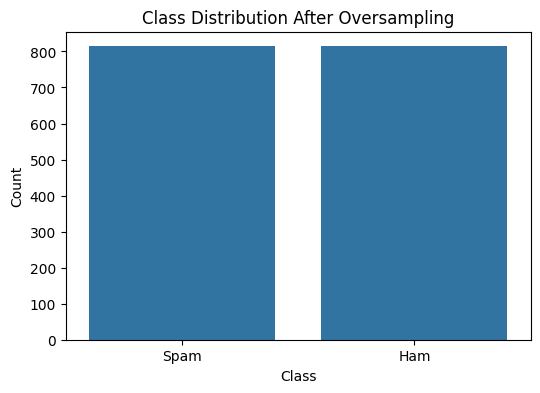

In [ ]:
from imblearn.over_sampling import RandomOverSampler

resampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train, y_train)

# Plot the oversampled class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_oversampled)
plt.title("Class Distribution After Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_oversampled, y_train_oversampled)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

# Computing the accuracy and making the confusion matrix
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, '\n\n')
print('---------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n",)
print (result)

accuracy:0.63


Confusion Matrix:
[[201   0]
 [144  47]] 


---------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

         Ham       0.58      1.00      0.74       201
        Spam       1.00      0.25      0.39       191

    accuracy                           0.63       392
   macro avg       0.79      0.62      0.57       392
weighted avg       0.79      0.63      0.57       392



## Sentiment Analysis

In [ ]:
comment = pd.read_csv("/content/Youtubespamdataset.csv")

comment.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CHANNEL
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",Spam,Psy
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,Spam,Psy
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,Spam,Psy
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,Spam,Psy
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,Spam,Psy


In [ ]:
comment.describe()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CHANNEL
count,1956,1956,1711,1956,1956,1956
unique,1953,1792,1709,1760,2,5
top,_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0,M.E.S,2013-10-05T00:57:25.078000,Check out this video on YouTube:﻿,Spam,Eminem
freq,2,8,2,97,1005,448


In [ ]:
# We can extract the values from the dictionary and create new columns within our dataframe

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

comment['compound'] = [sentiment.polarity_scores(comment)['compound'] for comment in comment['CONTENT']]
comment['neg'] = [sentiment.polarity_scores(comment)['neg'] for comment in comment['CONTENT']]
comment['neu'] = [sentiment.polarity_scores(comment)['neu'] for comment in comment['CONTENT']]
comment['pos'] = [sentiment.polarity_scores(comment)['pos'] for comment in comment['CONTENT']]

In [ ]:
comment.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CHANNEL,compound,neg,neu,pos
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",Spam,Psy,0.0000,0.000,1.000,0.000
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,Spam,Psy,0.6973,0.036,0.784,0.180
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,Spam,Psy,0.0000,0.000,1.000,0.000
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,Spam,Psy,0.3400,0.292,0.337,0.371
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,Spam,Psy,0.0000,0.000,1.000,0.000


In [ ]:
comment[['compound', 'neg', 'neu','pos']].describe()

,compound,neg,neu,pos
count,1956.000000,1956.000000,1956.000000,1956.000000
mean,0.269364,0.031794,0.766607,0.201602
std,0.407596,0.092657,0.251066,0.246779
min,-0.967100,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.603750,0.000000
50%,0.072600,0.000000,0.813000,0.107500
75%,0.636900,0.000000,1.000000,0.347250
max,0.992100,0.787000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

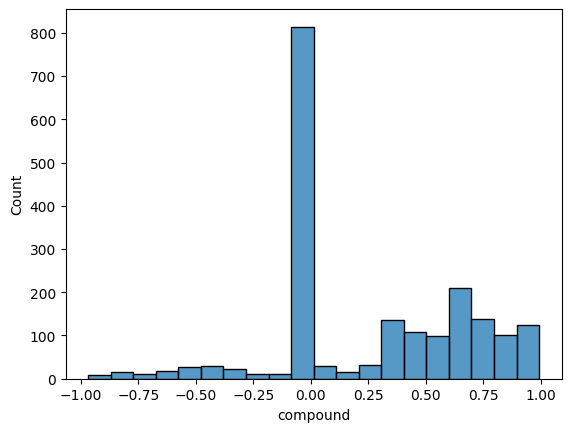

In [ ]:
#Distribution of the compound score

sns.histplot(comment['compound'])

<Axes: xlabel='pos', ylabel='Count'>

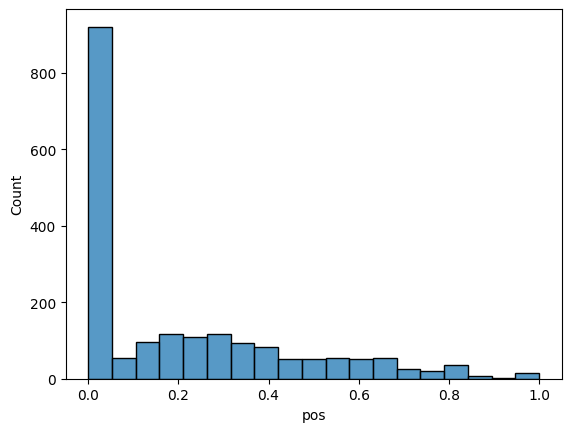

In [ ]:
sns.histplot(comment['pos'])

<Axes: xlabel='neg', ylabel='Count'>

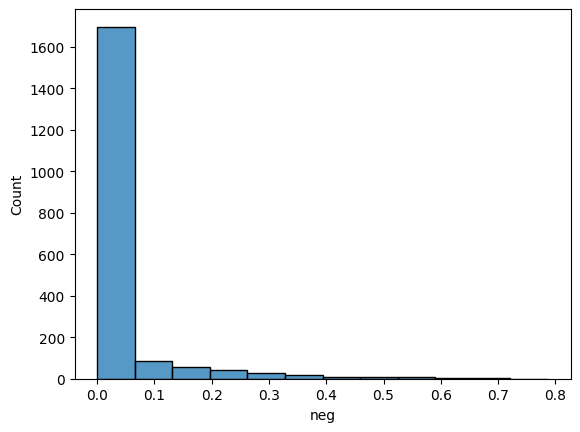

In [ ]:
sns.histplot(comment['neg'])

In [ ]:
## Let's look at how many negative reviews we have per CHANNEL

(comment['compound']<=0).groupby(comment['CHANNEL']).sum()

,compound
CHANNEL,
Eminem,206
KatyPerry,147
LMFAO,276
Psy,208
Shakira,130


In [ ]:
## calculate as percentage of total reviews

percent_negative  = pd.DataFrame((comment['compound']<=0).groupby(comment['CHANNEL']).sum()
                                /comment['CHANNEL'].groupby(comment['CHANNEL']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews', ascending=False)

percent_negative

,% negative reviews
CHANNEL,
LMFAO,63.013699
Psy,59.428571
Eminem,45.982143
KatyPerry,42.000000
Shakira,35.135135


<Axes: xlabel='% negative reviews', ylabel='CHANNEL'>

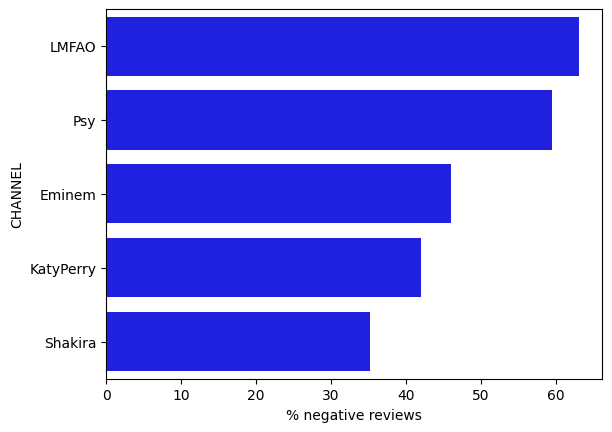

In [ ]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='b')

In [ ]:
comment.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CHANNEL,compound,neg,neu,pos
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Ham,Shakira,0.6988,0.0,0.697,0.303
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Ham,Shakira,0.8442,0.0,0.649,0.351
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,Ham,Shakira,0.5859,0.0,0.000,1.000
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Ham,Shakira,0.0000,0.0,1.000,0.000
1955,_2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,Ham,Shakira,0.6369,0.0,0.488,0.512


In [ ]:
#Processing the text data ready for wordcloud visualisation for comments on LMFAO channel


comment['processed_comment'] = comment['CONTENT'].apply(preprocess_text)

comment_positive_subset = comment.loc[
    (comment['CHANNEL'] == 'LMFAO') &
    (comment['compound'] > 0)
]

comment_negative_subset = comment.loc[(comment['CHANNEL']=='LMFAO')
                                       & (comment['compound']<=0),:]

comment_negative_subset.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CHANNEL,compound,neg,neu,pos,processed_comment
701,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,Ham,LMFAO,0.0,0.0,1.0,0.0,"[wierd, funni]"
705,z13rcnlyamexujnf022vcrb5qouetpjz404,Brian Brai,2015-05-28T08:58:10.905000,Shuffle﻿,Ham,LMFAO,0.0,0.0,1.0,0.0,[shuffl]
706,z13oe5si1ouygx2dv22vcrb5qouetpjz404,Brian Brai,2015-05-28T08:57:27.399000,Omg﻿,Ham,LMFAO,0.0,0.0,1.0,0.0,[omg]
708,z13ghh0z5z3li1q1i22jdjma0xn2z535404,Giovanni Jimenez,2015-05-28T03:52:56.877000,Awsome<br />﻿,Ham,LMFAO,0.0,0.0,1.0,0.0,"[awsom, br]"
709,z13lwnoznomnynobc04cd5oylkz4vbngkhk,Silvia Bascur,2015-05-28T03:26:23.957000,wow!!!!!! increible song!!!!!!!!!﻿,Ham,LMFAO,0.0,0.0,1.0,0.0,"[wow, increibl, song]"


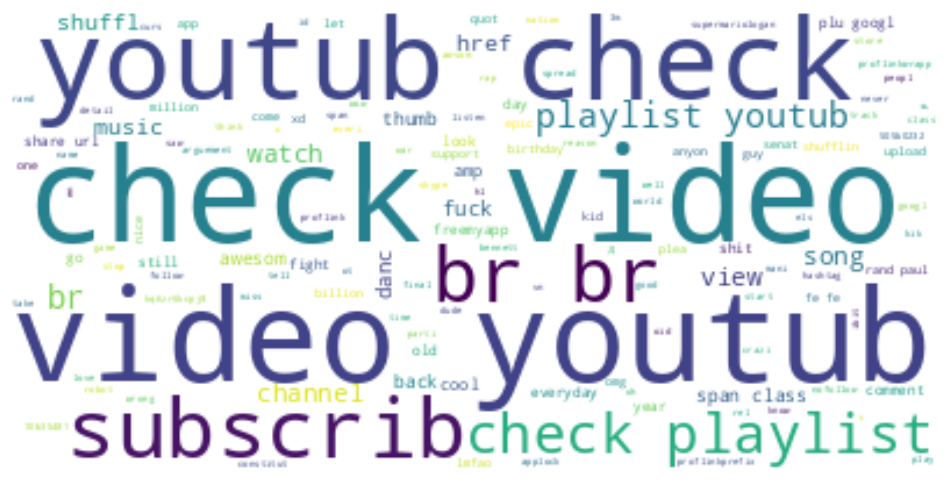

In [ ]:
## Wordcloud of words from negative comment on LMFAO YouTube channel

neg_tokens = [word for comment in comment_negative_subset['processed_comment'] for word in comment]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

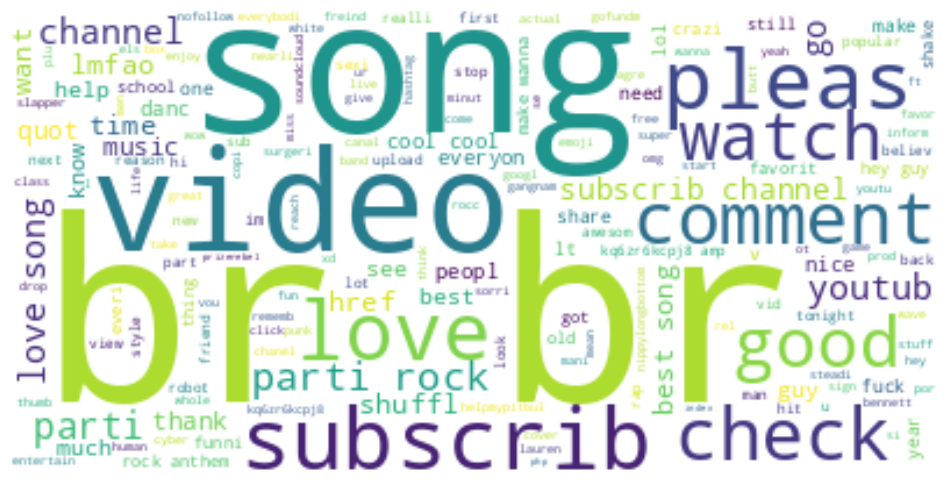

In [ ]:
#For positive review

pos_tokens = [word for comment in comment_positive_subset['processed_comment'] for word in comment]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Use the nltk FreDist and then tabulate

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

      br     song     like subscrib     love    parti       39    video  channel    pleas 
      93       46       44       32       31       26       25       23       21       21 


In [ ]:
# Use the nltk FreDist and then tabulate

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(30)

   check   youtub    video       br subscrib playlist       39     song     view      com     http  channel    watch   shuffl     2015    music     href    class     span     danc     fuck    thumb     back        1   awesom     like      get    googl     cool     rand 
     129      127      105       79       34       26       22       13       13       13       12       12       11       10       10        9        9        8        8        7        7        6        6        6        6        6        6        6        5        5 


<Axes: xlabel='Samples', ylabel='Counts'>

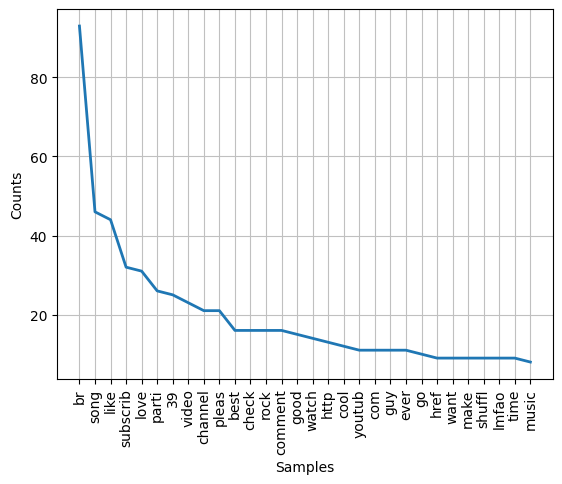

In [ ]:
pos_freqdist.plot(30)

<Axes: xlabel='Samples', ylabel='Counts'>

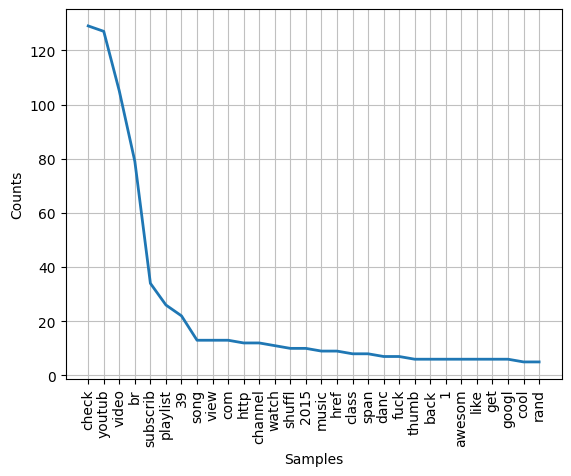

In [ ]:
neg_freqdist.plot(30)